<a href="https://colab.research.google.com/github/MicheleBroennimann/Group-Project/blob/main/Group%20Project%20Documentary2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Documentation of Group Project DSF**
*Johanna Feuchter, Michèle Brönnimann*

# Setup
Tasks: Obtain access to Chemzilla and Ubelix as well as all the described software.
To use ssh from a windows computer we first installed PuTTY:
https://www.putty.org/
We used the MSI (Windows):
64-bit x86: putty-64bit-0.76-installer.msi

Secondly we downloaded the FileZilla Application:
https://filezilla-project.org/

Then Chimera has been downloaded (to visualize the protein)
https://www.cgl.ucsf.edu/chimera/download.html



https://cheatography.com/davechild/cheat-sheets/linux-command-line/

--> very usefull cheatsheet for linux

# Tutorial 1
The GROMACS Tutorial has been followed on the chemzilla desktop:



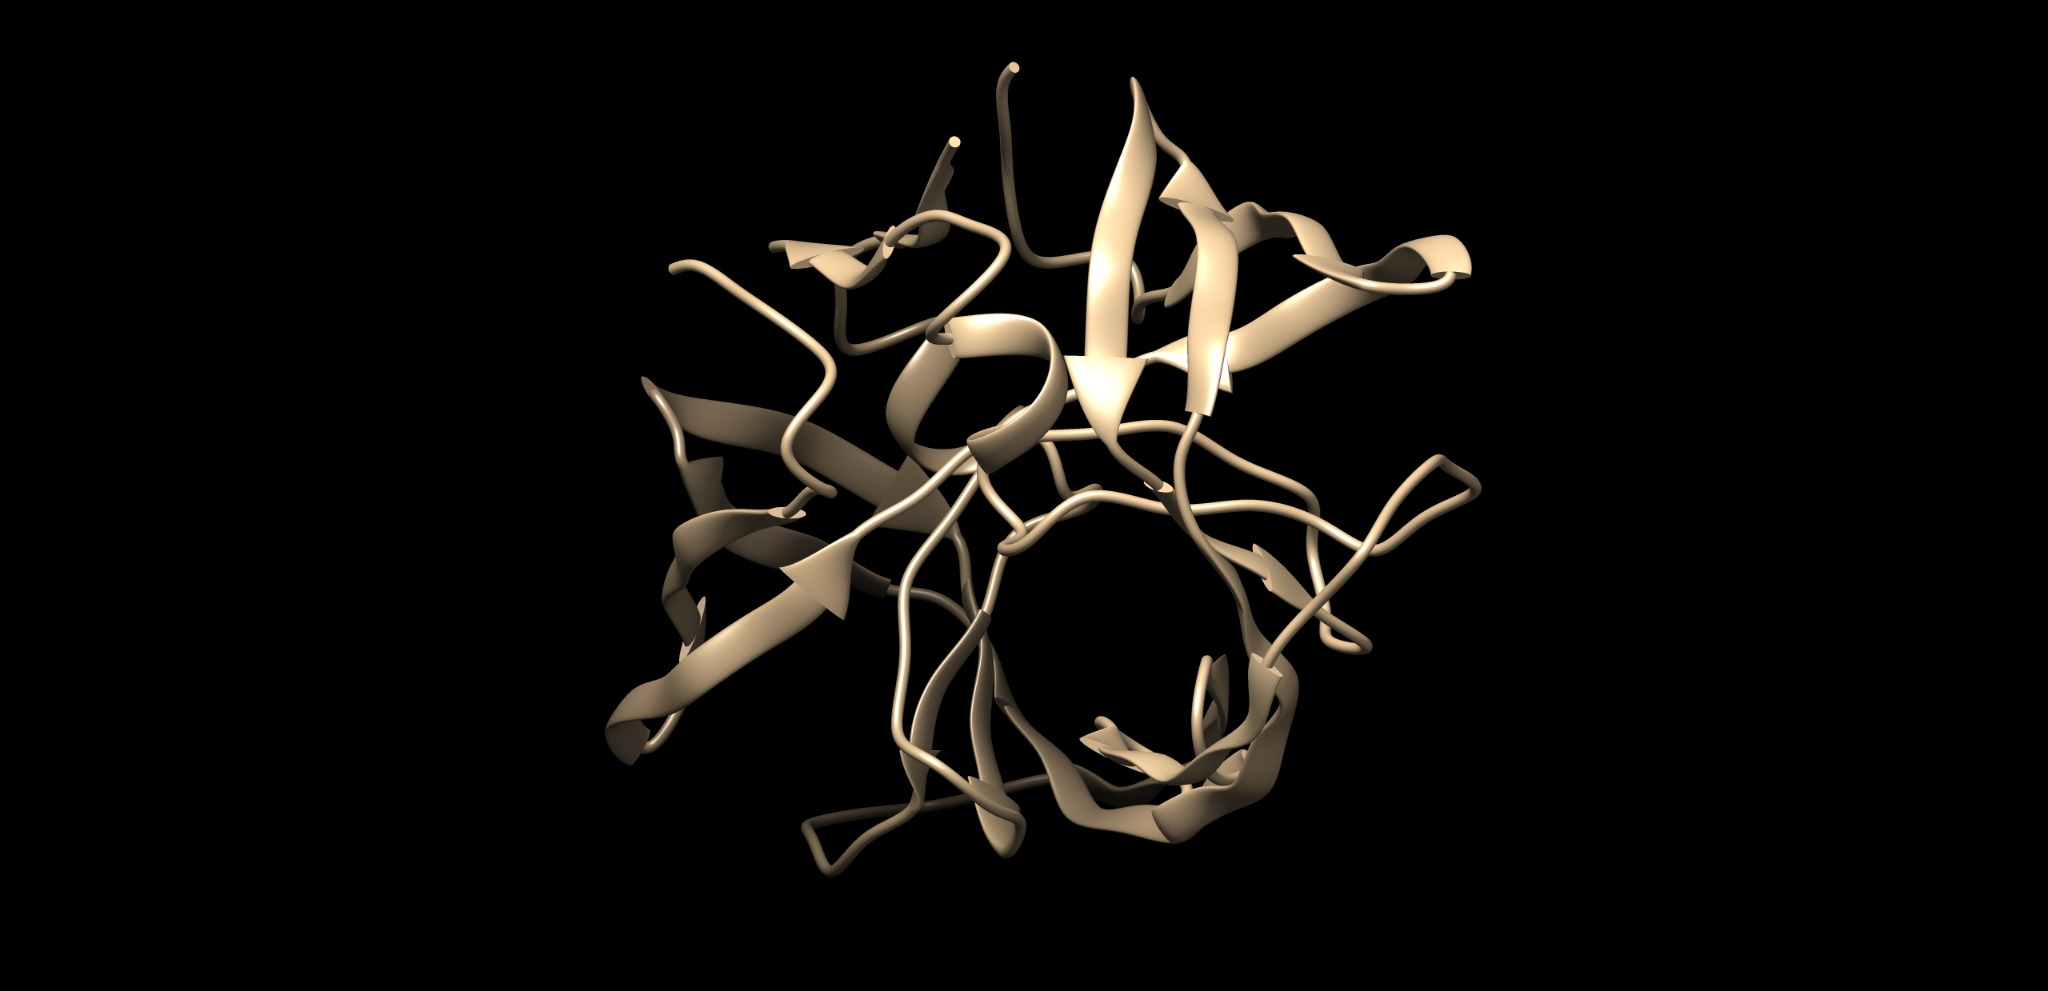

putty has been accessed using the IP address: 130.92.106.218 in the remote desktop of Windows.
Username: group2
PW: grp1b4

The file of the protein was transfered to the chemzilla desktop via filezilla



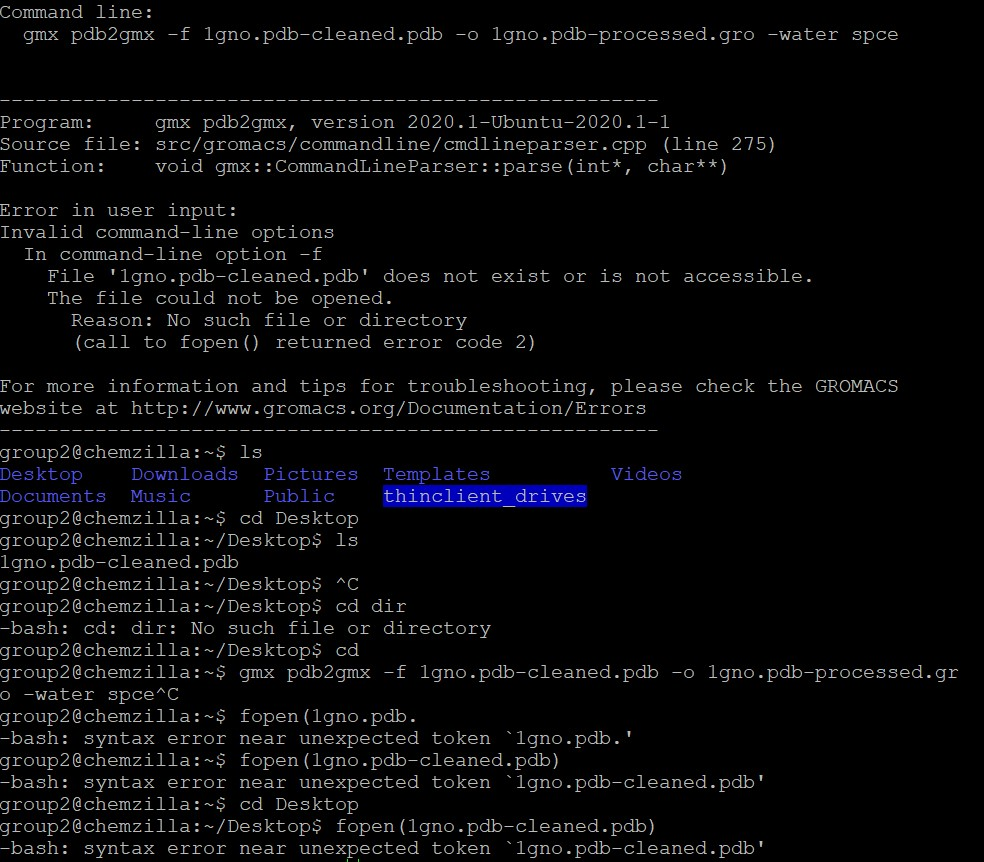

The file was found in the dir desktop with the name 1gno.pdb-cleaned.pdb . However when the function tries to find the file it calls an error by stating the file does not exist. Which is very unfortunate and we need a break. 

Next Day with a clearer mind the error was found: 
We worked in the wrong directory. The code has to be written in the same directory as the file is saved. 

**Step 1 Tutorial 1** Preparation



*   grep -v HOH 1gno.pdb-cleaned.pdb > 1gno_clean.pdb
*   gmx pdb2gmx -f 1gno_clean.pdb -o 1gno-processed.gro -water spce * 

The code was written on the chemzilla remote desktop in the directrory Desktop.
The preparing Part of the tutorial is done. 
For the force field, we used the all-atom OPLS force field, so type 15 in our case.
The code created the new files needed for the next steps.


**Step 2 of Tutorial 1** Topology


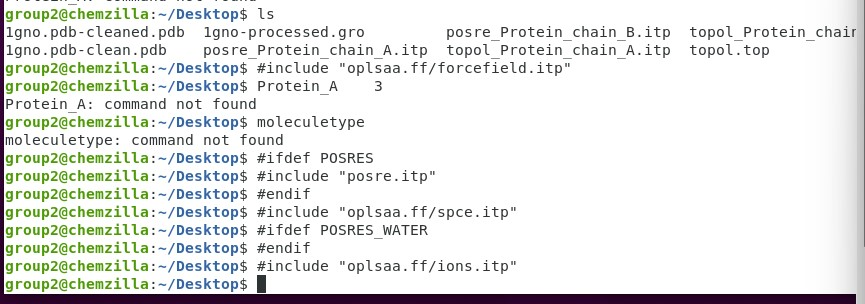

**Step 3 of Tutorial 1**
Solvation


Firstly we defined a box with the code:
 

*  gmx editconf -f 1gno-processed.gro -o 1gno_newbox.gro -c -d 1.0 -bt cubic

And then we filled this box with water:

*   gmx solvate -cp 1gno_newbox.gro -cs spc216.gro -o 1gno_solv.gro -p topol.top




the code reminded us of a very important thing: 
"Youth is wasted on the young" (The Smashing Pumpkins)

**Step 4 of tutorial 1**
Adding Ions

for this step an additional file has been downloaded: http://www.mdtutorials.com/gmx/lysozyme/Files/ions.mdp

We assembled the file

*   gmx grompp -f ions.mdp -c 1gno_solv.gro -p topol.top -o ions.tpr
* gmx genion -s ions.tpr -o 1gno_solv_ions.gro -p topol.top -pname NA -nname CL -neutral





GROMACS reminded us that "Everybody has a plan until they get punched in the mouth".
Especially wise words from Mike Tyson

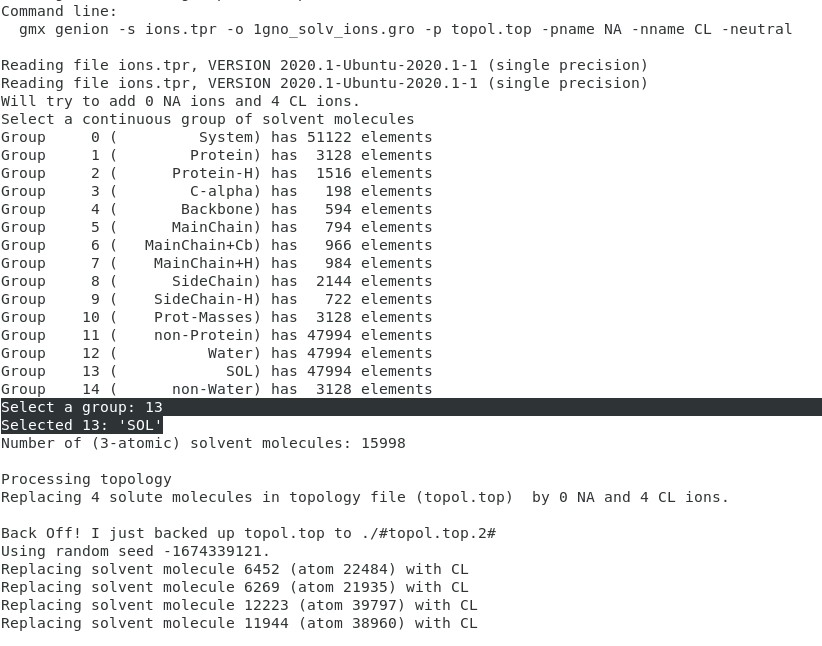

When asked which group we want to use, we choose group 13 "SOL" for embedding ions.

**Step 5 of Tutorial 1** 
Energy minimalization

This code assembles the binary imput and carries out the EM

Also for this step another file had to be downloaded:
http://www.mdtutorials.com/gmx/lysozyme/Files/minim.mdp

*   gmx grompp -f minim.mdp -c 1gno_solv_ions.gro -p topol.top -o em.tpr
*   gmx mdrun -v -deffnm em



Next up was the energy minimazing step, where many lines were calculated. At the end the code stated:

writing lowest energy coordinates.

Steepest Descents converged to Fmax < 1000 in 980 steps
Potential Energy  = -8.8128812e+05
Maximum force     =  9.2213806e+02 on atom 1980
Norm of force     =  1.8856186e+01


additionaly a important reminder for chemists: "All approaches at a higher level are suspect until confirmed at the molecular level." (Francis Crick)



Next step was to analize the potential 
to plot those results Xmgrace had to be downloaded, but the website was very confusing and we didn't get wich part to download. 
http://plasma-gate.weizmann.ac.il/Grace/

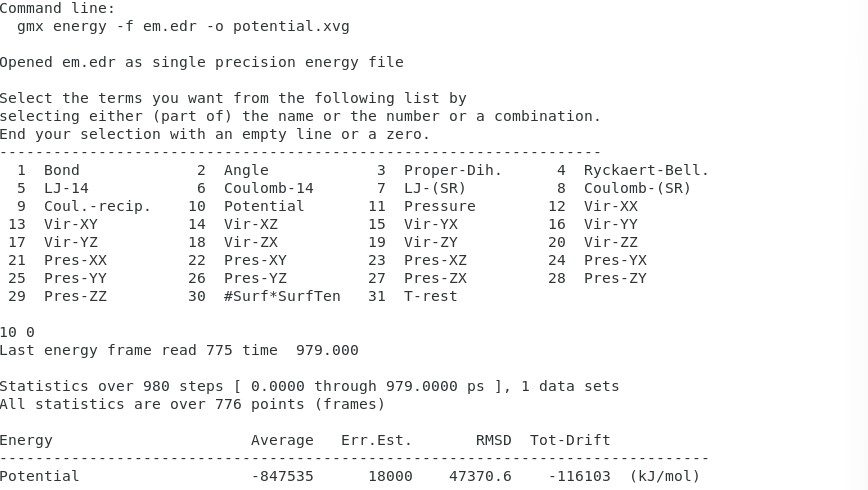

[Ask for Help with plotting the EM step]!

Help was sent! the Xmgrace wasn't on chemzilla but it's been downloaded :)

**Step 6 Tutorial 1** Equilibration

For this step another document has been downloaded: http://www.mdtutorials.com/gmx/lysozyme/Files/nvt.mdp





*   gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr


*   gmx mdrun -deffnm nvt

*   gmx energy -f nvt.edr -o temperature.xvg
*   gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr

*   gmx mdrun -deffnm

*   gmx energy -f npt.edr -o pressure.xvg


*   gmx energy -f npt.edr -o density.xvg








The code confronted us with a prompt that wasn't expected. 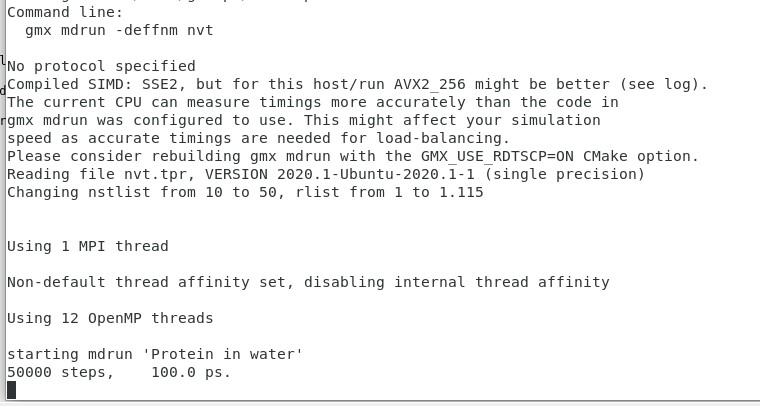

What should we give back to the code? 

The second promt was a lot easier because we knew what to expect. We gave the parameter 16 0, that the tutorial suggested, as answer and the programm calculated everything for us. 


The programm even reminded us that "Trying is the first step towards failure." (Homer Simpson)

Again, the task was to plot something but as it wasn't possible without having downloaded the Xmgrace, this part will be repeated after knowing more. 

for the second equilibration another file is needed: http://www.mdtutorials.com/gmx/lysozyme/Files/npt.mdp



xmgrace would't plot my graphs.
When put into the terminal with the code 

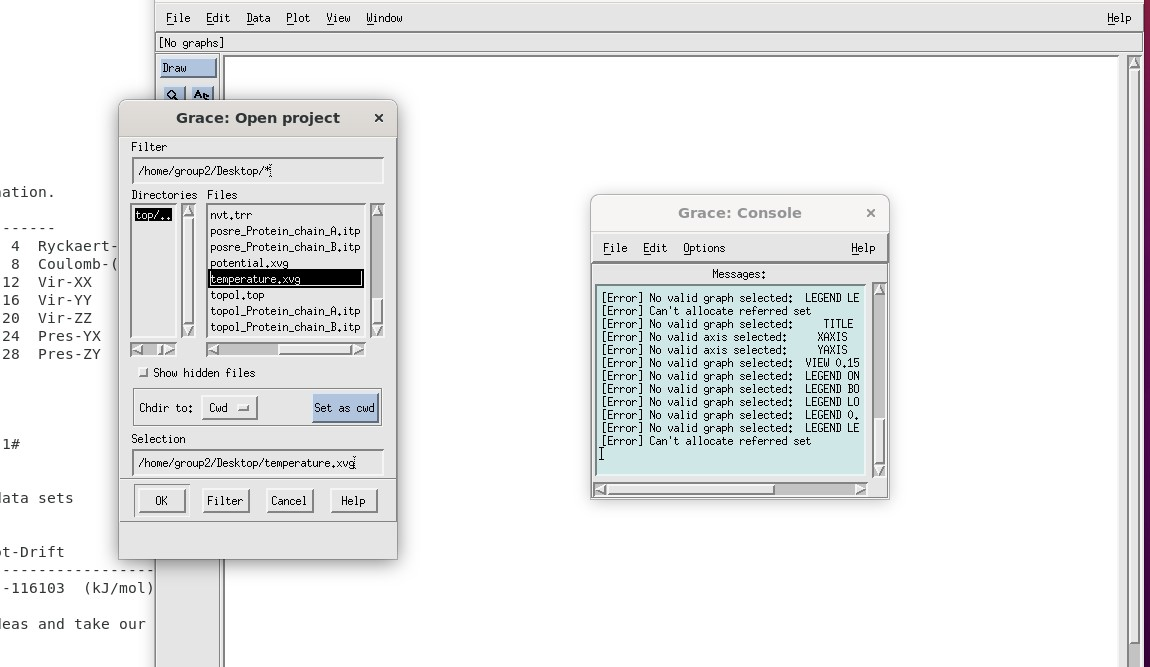

**Step 7 Tutorial 1** Production MD
another file to download for the next task.

http://www.mdtutorials.com/gmx/lysozyme/Files/md.mdp